In [ ]:
# 4th order GLLE equation

In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.io import savemat

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# start AUTO with runner object
runner = ra.runAUTO()

# run AUTO script from initial condition P=0
# specify theta as PAR 2
# UZSTOP tells AUTO when to stop the continuation
r1 = ac.run(e='LLE', c='LLE', runner=runner, PAR={2 : 2.0}, UZSTOP={1: [2.5, 0 ]})

# extract and save AUTO data

# bifurcation diagram
bd = { "par"       : r1[0].coordarray[0,:], 
       "L2norm"    : r1[0].coordarray[1,:]
     }

# individual solutions
sols = [ {  "u"     : np.array( [ s['U('+str(j)+')'] for j in range(1,5) ]  ),
            "t"     : np.array( s['t'] ), 
            "P"     : s.PAR(1),
            "theta" : s.PAR(2),
            "norm"  : s['L2-NORM']
         } for s in r1() ]

# export to MATLAB
mdic = { 'sols' : sols, 'bd' : bd }
savemat('LLE1.mat', mdic)

Starting LLE ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)   
   1     1  EP    1   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1    10        2   5.20577E-01   2.38200E-01   1.08993E-01  -2.11801E-01   2.14417E-17   2.23256E-16
   1    20        3   1.34121E+00   7.86403E-01   4.61098E-01  -6.37039E-01   1.42824E-16   3.58180E-16
   1    23  LP    4   1.41421E+00   1.00000E+00   7.07112E-01  -7.07107E-01   1.01359E-14   2.18553E-16
   1    25  BP    5   1.39878E+00   1.11304E+00   8.85679E-01  -6.74120E-01   1.38295E-10   2.52970E-11
   1    27  BP    6   1.37277E+00   1.21012E+00   1.06675E+00  -5.71353E-01   5.76394E-11   6.70882E-12
   1    30  LP    7   1.36083E+00   1.29099E+00   1.22475E+00  -4.08248E-01   7.36971E-15   3.77047E-20
   1    40        8   1.62065E+00   1.53162E+00   1.44749E+00   5.00646E-01   4.12541E-14   2.65835E-14
   1    42  BP    9   1.73300E+00   1.57051E+

Created plot


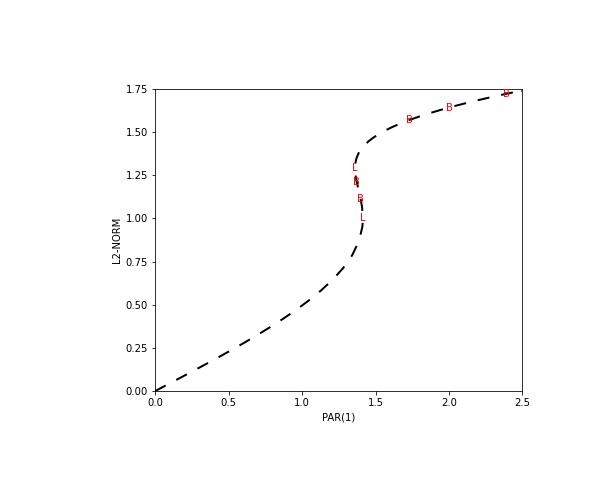

In [3]:
# plot bifurcation diagram using AUTO plot routine

p = ac.plot(r1)
p.config(type='bifurcation')
p.config(grid=False)
p.config(stability=True)
p.savefig('b.png')
display(Image.open('b.png'))

In [81]:
# follow solutions on one of the branches from the main branch of CW solutions

# ISW=-1 performs branch switching
# r1('BP1') indicates first branch point, etc
# r1(51) starts from label 51, etc
r2 = ac.run(r1('BP1'), c='LLE', ISW=-1, NMX=250, DS=-0.01, runner=runner)

# extract and save AUTO data

# bifurcation diagram
bd2 = { "par"       : r2[0].coordarray[0,:], 
       "L2norm"     : r2[0].coordarray[1,:]
     }

# individual solutions
sols2 = [ { "u"     : np.array( [ s['U('+str(j)+')'] for j in range(1,5) ]  ),
            "t"     : np.array( s['t'] ), 
            "P"     : s.PAR(1),
            "theta" : s.PAR(2),
            "norm"  : s['L2-NORM']
         } for s in r2() ]

# export to MATLAB
mdic = { 'sols2' : sols2, 'bd2' : bd2 }
savemat('LLEbranch2.mat', mdic)

Starting LLE ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)   
   2    10       14   1.38616E+00   1.11899E+00   1.07136E+00  -6.29773E-01   1.89715E-01   3.20944E-02
   2    20       15   1.34755E+00   1.14176E+00   1.31956E+00  -5.61660E-01   4.32372E-01   4.69437E-02
   2    30       16   1.30782E+00   1.17865E+00   1.55518E+00  -4.53149E-01   6.75678E-01   3.76486E-02
   2    40       17   1.28585E+00   1.22560E+00   1.74874E+00  -2.15060E-01   8.98320E-01   1.38101E-01
   2    44  LP   18   1.28422E+00   1.24335E+00   1.80164E+00  -1.17471E-01   9.66287E-01   1.92295E-01
   2    46  BP   19   1.28470E+00   1.25320E+00   1.82702E+00  -6.25833E-02   1.00085E+00   2.25279E-01
   2    50       20   1.28562E+00   1.26022E+00   1.84344E+00  -2.33726E-02   1.02404E+00   2.49760E-01
   2    60       21   1.28802E+00   1.27137E+00   1.86704E+00   3.95265E-02   1.05853E+00   2.90308E-01
   2    70       22   1.28803E+00   1.27141E+

Created plot


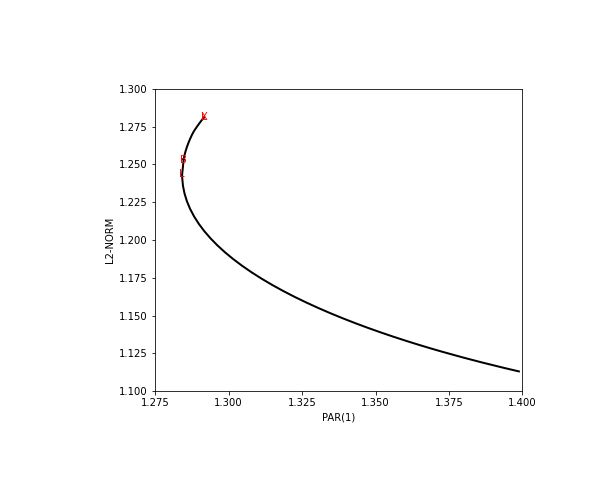

In [82]:
# plot bifurcation diagram using AUTO plot routine

p = ac.plot(r2)
p.config(type='bifurcation')
p.config(grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

In [83]:
# follow solutions on one of the branches from the secondary branch

# ISW=-1 performs branch switching
# r1('BP1') indicates first branch point, etc
# r1(51) starts from label 51, etc
r3 = ac.run(r2('BP1'), c='LLE', ISW=-1, NMX=250, DS=-0.01, runner=runner)

# extract and save AUTO data

# bifurcation diagram
bd3 = { "par"       : r3[0].coordarray[0,:], 
       "L2norm"     : r3[0].coordarray[1,:]
     }

# individual solutions
sols3 = [ { "u"     : np.array( [ s['U('+str(j)+')'] for j in range(1,5) ]  ),
            "t"     : np.array( s['t'] ), 
            "P"     : s.PAR(1),
            "theta" : s.PAR(2),
            "norm"  : s['L2-NORM']
         } for s in r3() ]

# export to MATLAB
mdic = { 'sols3' : sols3, 'bd3' : bd3 }
savemat('LLEbranch3.mat', mdic)

Starting LLE ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)   
   3     4  BP   35   1.28425E+00   1.24601E+00   1.80878E+00  -1.02649E-01   9.75940E-01   2.01047E-01
   3     5  LP   36   1.28425E+00   1.24601E+00   1.80895E+00  -1.02269E-01   9.76037E-01   2.01246E-01
   3    10       37   1.28702E+00   1.24661E+00   1.86256E+00   3.44860E-02   1.04826E+00   2.86983E-01
   3    20       38   1.30131E+00   1.24970E+00   1.91811E+00   2.46817E-01   1.14014E+00   4.33936E-01
   3    30       39   1.32097E+00   1.25383E+00   1.94210E+00   4.17424E-01   1.19646E+00   5.62149E-01
   3    40       40   1.35444E+00   1.26026E+00   1.94952E+00   6.24172E-01   1.24669E+00   7.29257E-01
   3    50       41   1.39513E+00   1.26558E+00   1.93699E+00   8.15107E-01   1.27621E+00   8.94485E-01
   3    60       42   1.43633E+00   1.26069E+00   1.91388E+00   9.72699E-01   1.29049E+00   1.03946E+00
   3    66  LP   43   1.44790E+00   1.24196E+

Created plot


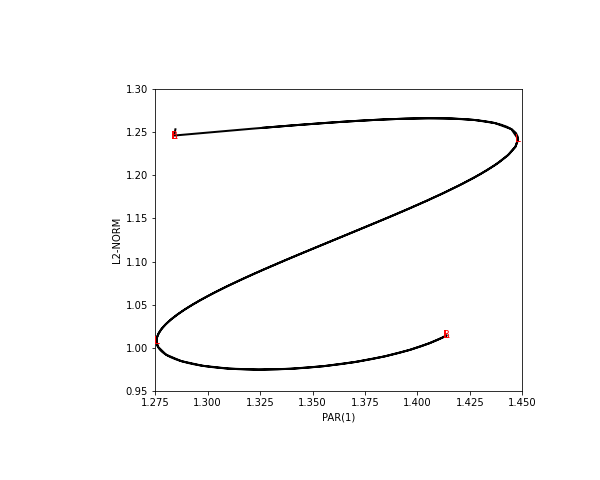

In [84]:
# plot bifurcation diagram using AUTO plot routine

p = ac.plot(r3)
p.config(type='bifurcation')
p.config(grid=False)
p.savefig('b.png')
display(Image.open('b.png'))